In [10]:
%load_ext autoreload
%autoreload 2

import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from generate_perturbation import pipeline
from extract_image_mask import create_mask
import matplotlib.pyplot as plt
from pytorchyolo.models import load_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
def tensor_to_image(image):
    return np.transpose(image.detach().cpu().squeeze().numpy(), (1, 2, 0))

In [12]:
#TODO: CHANGE THESE VARS
IMG_PATH = "D:\\Janjan Chua\\Downloads\\crop_137011530_224204039252871_285536428304464810_n.jpg"
CHOSEN_COLOR_SPACE = "LAB" #TODO: <-- pick a colorspace
CHOSEN_REGION = "bbox"  #TODO: <-- pick the region where the feature is extracted
DETECTION_MODEL = 0 #0 yf, 1 mp, 2 yn
PERTURB_REGION = 0 #0 - mask, 1 - bbox, 2-lbbox
PRED_MODEL = 0 #0 mpr, 1 rfr, 2 svr

In [13]:
yf_eps_path = [
    [
        "models/mpr_tunedfs_bo_LAB_bbox_e_face_yf.pkl",
        "models/rfr_tunedfs_bo_LAB_bbox_e_face_yf.pkl",
        "models/svr_tunedfs_bo_LAB_bbox_e_face_yf.pkl"
    ],
    [
        "models/mpr_tunedfs_bo_LAB_bbox_e_bbox_yf.pkl",
        "models/rfr_tunedfs_bo_LAB_bbox_e_bbox_yf.pkl",
        "models/svr_tunedfs_bo_LAB_bbox_e_bbox_yf.pkl"
    ],
    [
        "models/mpr_tunedfs_bo_LAB_bbox_e_lbbox_yf.pkl",
        "models/rfr_tunedfs_bo_LAB_bbox_e_lbbox_yf.pkl",
        "models/svr_tunedfs_bo_LAB_bbox_e_lbbox_yf.pkl"
    ]
]

mp_eps_path = [
    [
        "models/mpr_tunedfs_bo_LAB_bbox_e_face_mp.pkl",
        "models/rfr_tunedfs_bo_LAB_bbox_e_face_mp.pkl",
        "models/svr_tunedfs_bo_LAB_bbox_e_face_mp.pkl"
    ],
    [
        "models/mpr_tunedfs_bo_LAB_bbox_e_bbox_mp.pkl",
        "models/rfr_tunedfs_bo_LAB_bbox_e_bbox_mp.pkl",
        "models/svr_tunedfs_bo_LAB_bbox_e_bbox_mp.pkl"
    ],
    [
        "models/mpr_tunedfs_bo_LAB_bbox_e_lbbox_mp.pkl",
        "models/rfr_tunedfs_bo_LAB_bbox_e_lbbox_mp.pkl",
        "models/svr_tunedfs_bo_LAB_bbox_e_lbbox_mp.pkl"
    ]
]

yn_eps_path = [
    [
        "models/mpr_tunedfs_bo_LAB_bbox_e_face_yn.pkl",
        "models/rfr_tunedfs_bo_LAB_bbox_e_face_yn.pkl",
        "models/svr_tunedfs_bo_LAB_bbox_e_face_yn.pkl"
    ],
    [
        "models/mpr_tunedfs_bo_LAB_bbox_e_bbox_yn.pkl",
        "models/rfr_tunedfs_bo_LAB_bbox_e_bbox_yn.pkl",
        "models/svr_tunedfs_bo_LAB_bbox_e_bbox_yn.pkl"
    ],
    [
        "models/mpr_tunedfs_bo_LAB_bbox_e_lbbox_yn.pkl",
        "models/rfr_tunedfs_bo_LAB_bbox_e_lbbox_yn.pkl",
        "models/svr_tunedfs_bo_LAB_bbox_e_lbbox_yn.pkl"
    ]
]

eps_path_list = [yf_eps_path, mp_eps_path, yn_eps_path]

In [14]:
random_state = 100
curr_eps_path = eps_path_list[DETECTION_MODEL][PERTURB_REGION][PRED_MODEL]
eps_model = joblib.load(curr_eps_path)

CSV_FILENAME = "DROPPEDWITHATTRIBUTESNULL_recompiled_features_updated_yunet_pixels_bg_pixels_fixlbbox.csv" #<-- update csv name
df_features = pd.read_csv(CSV_FILENAME)
train_set, test_set = train_test_split(df_features, test_size = 0.2, random_state=random_state)

crop_137011530_224204039252871_285536428304464810_n


2023-04-13 03:12:42,617 - part_label_dataset - INFO - reading the image files...
2023-04-13 03:12:42,619 - part_label_dataset - INFO - finished initializing the dataloader 1 files.
viz: 0it [00:03, ?it/s]

IMAGE FILENAME IS: crop_137011530_224204039252871_285536428304464810_n_0_image_final.png


mask_crop_137011530_224204039252871_285536428304464810_n_0_image_final.png
Face 0


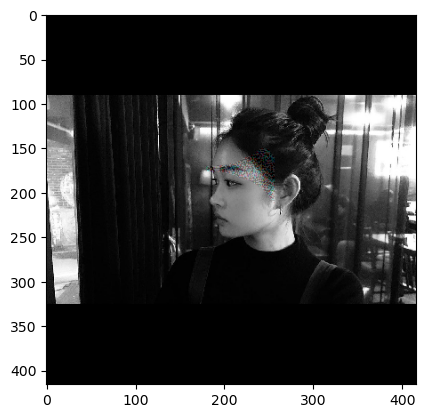

In [19]:
create_mask(img_path)
image = pipeline(IMG_PATH, eps_model, CHOSEN_COLOR_SPACE, CHOSEN_REGION, PERTURB_REGION)
image = tensor_to_image(image)
plt.imshow(image)

In [ ]:
# #TODO: load model here (edit this whole cell as necessary, idk paano magproperly load from joblib)
# random_state = 100

# import joblib
# from sklearn.base import clone as clone_model

# labels = {"mask": "e_bbox_yf", "bbox": "e_face_yf"}

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# categorical_columns = df_features.select_dtypes(include=[bool, object]).columns
# encoded_columns = df_features[categorical_columns].apply(encoder.fit_transform)

# df_encoded_features = df_features.copy()
# df_encoded_features[categorical_columns] = encoded_columns

# def get_features_and_label(color_space, region):
#     features = ["w", "h", "x", "y"]
#     for color_channel in color_channels[color_space]: 
#         features += [color_channel + region + "_" + str(i) for i in range(26)]
#     features += ["LBP_BIN_" + region + "_" + str(i) for i in range(26)]
#     features += ["SOBELX_BIN_" + region + "_" + str(i) for i in range(20)]
#     features += ["SOBELY_BIN_" + region + "_" + str(i) for i in range(20)]
#     features += ["SOBEL_BIN_" + region + "_" + str(i) for i in range(20)]
#     return features, labels[region]

# from sklearn.model_selection import train_test_split
# features, _ = get_features_and_label(CHOSEN_COLOR_SPACE, CHOSEN_REGION)
# label = "e_bbox_yf"

# X_features =  df_encoded_features.loc[:,  features]
# y_features = df_encoded_features.loc[:, label].values #<-- pick label

# X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size = 0.2, random_state=random_state)